In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Multiomics modeling

Let's look at the paper *"Multiomics modeling of the immunome, transcriptome, microbiome, proteome and metabolome adaptations during human pregnancy"* by **Ghaemi et al. 2019** (`task1_multiomics_ghaemi2019multiomics.pdf`).
The idea is to use biological measurements to characterize biological changes during pregnancy.

## Important Note

There is no need to get acquainted with the biological intricacies of multiomics modeling. The interesting part is the study design and experimental setup.

## Load the data

Load the data from `multiomics_data.pickle` using `pickle`. You will get a [pandas](https://pandas.pydata.org/docs/user_guide/10min.html) DataFrame containing preprocessed data from the paper (the original data from their paper is a bit messy). The data contains several meta attributes as well as the different modalities.

Meta attributes include:

* `Sex`: sex of the baby
* `timepoint`: 1-3 correspond to the three trimesters, 4 corresponds to postpartum
* `gestational_age`: time of sampling

Modalites are:
    
* `cellfree_rna`
* `metabolomics`
* `microbiome`
* `plasma_luminex`
* `serum_luminex`
* `immune_system`
* `plasma_somalogic`

For more details please see the paper.

In [ ]:
# code for loading the data
import pickle

with open("task1_multiomics_data.pickle", "rb") as file:
    data_multiomics = pickle.load(file)

data_multiomics.head(5)

Training/Validation Gates ID       MRN Study Subject ID Number     Sex  \
                                                                           
0                   T  PTLG002  16661779                   10565    Male   
1                   T  PTLG002  16661779                   10565    Male   
2                   T  PTLG002  16661779                   10565    Male   
3                   T  PTLG002  16661779                   10565    Male   
4                   T  PTLG004  23587868                   10603  Female   

  sex_bin timepoint gestational_age cellfree_rna                ...  \
                                       0_C2orf76      1_ACTL10  ...   
0       1         1              11     0.312437 -1.892930e-16  ...   
1       1         2              18     0.312437 -1.892930e-16  ...   
2       1         3              32     0.312437 -1.892930e-16  ...   
3       1         4              45     0.312437 -1.892930e-16  ...   
4       0         1              11     5.204209  1.734736e+00  ...   

  plasma_somalogic                                                             \
       1290_UBE2G2 1291_TAGLN2 1292_ATP5O 1293_POMC 1294_CRYZL1 1295_SERPINF1   
0           4804.4      2233.0     3610.9     715.8       151.4       37885.8   
1           4086.0      2160.5     2260.4     825.2       161.0       41821.5   
2           4328.0      1818.4     2445.2    1241.8       194.6       45526.1   
3           3442.4      2661.4     3879.2     703.6       153.7       36862.5   
4           4261.9      1804.6     1470.6     526.8       163.0       38938.3   

                                              
  1296_CTSF 1297_FTCD 1298_USP25 1299_PLXNB2  
0    1479.1    3261.8      561.3      3227.0  
1    1465.1    1839.8      597.8      3366.0  
2    1428.3    3057.2      625.7      8703.7  
3    1063.6    7339.7      593.2      2918.9  
4    1170.1    1036.8      552.8      3457.1  

[5 rows x 61274 columns]

In [62]:
# look at the immune system
data_multiomics["immune_system"].head(5)

,0_Bcells,1_CD16+CD56-NKcells,2_CD4+Tcells_mem,3_CD4+Tcells_naive,4_CD4+Tcells,5_CD45RA+Tregs,6_CD45RA-Tregs,7_CD56+CD16-NKcells,8_CD7+NKcells,9_CD8+Tcells_mem,...,524_M-MDSC_STAT5_Unstim,525_mDCs_STAT5_Unstim,526_ncMCs_STAT5_Unstim,527_pDCs_STAT5_Unstim,528_Tbet+CD4+Tcells_mem_STAT5_Unstim,529_Tbet+CD4+Tcells_naive_STAT5_Unstim,530_Tbet+CD8+Tcells_mem_STAT5_Unstim,531_Tbet+CD8+Tcells_naive_STAT5_Unstim,532_TCRgd+Tcells_STAT5_Unstim,533_Tregs_STAT5_Unstim
0,0.053164,0.054978,0.297875,0.136289,0.445832,0.002570,0.013848,0.007052,0.070836,0.118884,...,0.998954,0.953637,1.082629,0.808610,0.504269,0.757424,0.462045,0.454665,0.443859,0.529431
1,0.052857,0.069794,0.279917,0.140350,0.430839,0.002470,0.010923,0.004759,0.080245,0.127831,...,0.930847,0.822618,0.931126,0.728738,0.613059,0.852393,0.506981,0.474408,0.491691,0.574133
2,0.053202,0.050829,0.277997,0.187659,0.479078,0.003473,0.013359,0.005302,0.063781,0.104513,...,1.077824,0.970954,1.011011,0.749277,0.752882,0.813249,0.560379,0.481862,0.505706,0.640245
3,0.049906,0.090496,0.266336,0.156263,0.432904,0.003071,0.014459,0.004318,0.101386,0.115243,...,0.976888,0.918164,1.028114,0.790166,0.505349,0.648406,0.464522,0.445444,0.438285,0.573058
4,0.103067,0.004128,0.162746,0.103950,0.270840,0.003198,0.007988,0.007153,0.090763,0.057064,...,0.890405,0.800468,1.067789,0.563615,0.464563,1.004497,0.378557,0.423530,0.332368,0.447904


## Task 1.1: Reproduce Figure 2 from the paper

**Reproduce Figure 2D** from the paper with two simplifications:
1) Only use the `immune_system` modality.
2) No need to explore different models. Just use a support vector machine with grid search for hyperparameter optimization.
    ```
    param_grid={"C": [0.1, 1.0, 10.0], "epsilon": [0.01, 0.1, 1.0], "kernel": ["linear", "rbf"]}
    ```

* **Hint:** To train and evaluate models, you can use [scikit-learn](https://scikit-learn.org/stable/tutorial/basic/tutorial.html).

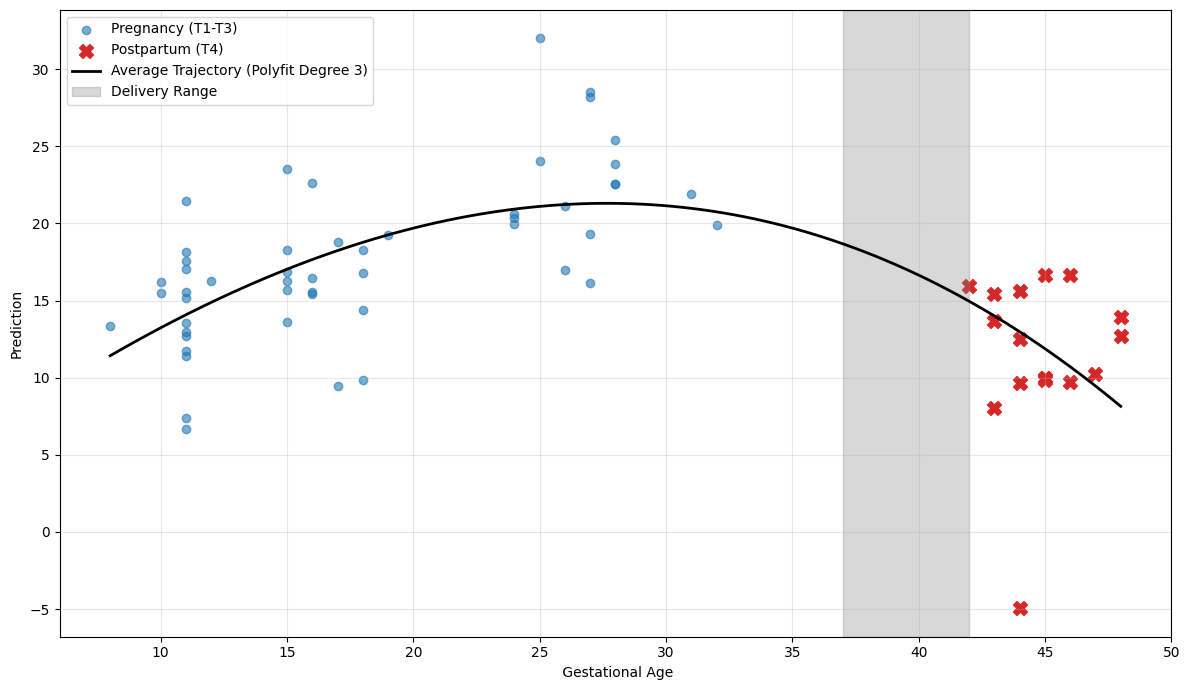

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import pickle


with open("task1_multiomics_data.pickle", "rb") as file:
  data_multiomics = pd.read_pickle(file)


# Get the immune_system, gestational_age, and Gates ID from the dataset.
X_immune = data_multiomics["immune_system"]
y_gestational_age = data_multiomics["gestational_age"]
timepoints = data_multiomics["timepoint"]
subject_ids = data_multiomics["Gates ID"]


results_df = pd.DataFrame({
    'Actual_GA': y_gestational_age,
    'Predicted_GA': np.nan,
    'Timepoint': timepoints,
    'SubjectID': subject_ids
})

unique_subjects = subject_ids.unique()

# Two-layer Cross Validation
for i, subject in enumerate(unique_subjects):


    test_mask = (subject_ids == subject)


    train_mask = (~test_mask) & (timepoints.isin([1, 2, 3]))

    X_train = X_immune[train_mask]
    y_train = y_gestational_age[train_mask]
    groups_train = subject_ids[train_mask]
    X_test = X_immune[test_mask]

    # Automated machine learning process
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svr', SVR())
    ])


    param_grid = {
        "svr__C": [0.1, 1.0, 10.0],
        "svr__epsilon": [0.01, 0.1, 1.0],
        "svr__kernel": ["linear", "rbf"]
    }


    inner_cv = GroupKFold(n_splits=3)

    # Grid search
    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        cv=inner_cv,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )


    grid_search.fit(X_train, y_train, groups=groups_train)


    best_model = grid_search.best_estimator_
    preds = best_model.predict(X_test)


    results_df.loc[test_mask, 'Predicted_GA'] = preds


plt.figure(figsize=(12, 7))
mask_preg = results_df['Timepoint'].isin([1, 2, 3])
mask_post = results_df['Timepoint'] == 4

plt.scatter(
    results_df[mask_preg]['Actual_GA'],
    results_df[mask_preg]['Predicted_GA'],
    color='#1f77b4',
    alpha=0.6,
    label='Pregnancy (T1-T3)'
)

plt.scatter(
    results_df[mask_post]['Actual_GA'],
    results_df[mask_post]['Predicted_GA'],
    color='#d62728',
    marker='X',
    s=100,
    label='Postpartum (T4)'
)

X_data = results_df['Actual_GA'].values
Y_data = results_df['Predicted_GA'].values

z = np.polyfit(X_data, Y_data, 3)
p = np.poly1d(z)
X_line = np.linspace(X_data.min(), X_data.max(), 100)
Y_line = p(X_line)

plt.plot(
    X_line,
    Y_line,
    color='black',
    linestyle='-',
    linewidth=2,
    label='Average Trajectory (Polyfit Degree 3)'
)


plt.axvspan(37, 42, color='gray', alpha=0.3, label='Delivery Range')


rmse = np.sqrt(mean_squared_error(
    results_df[mask_preg]['Actual_GA'],
    results_df[mask_preg]['Predicted_GA']
))





plt.xlabel(" Gestational Age")
plt.ylabel("Prediction")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Task 1.2: Sex of the baby

Use a neural network in PyTorch to predict the sex of the baby using the `immune_system` modality.

**Hint:** Don't optimize. The basic setup is enough.

In [124]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pickle
import pandas as pd


with open("task1_multiomics_data.pickle", "rb") as file:
    data_multiomics = pd.read_pickle(file)



X = data_multiomics['immune_system'].astype(np.float32)
y_np = data_multiomics[('sex_bin', '')].values.astype(np.float32).reshape(-1, 1)
groups_np = data_multiomics[('Gates ID', '')].values




scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_t = torch.from_numpy(X_scaled)
y_t = torch.from_numpy(y_np)

 # Build Model
class SexClassifier(nn.Module):
    def __init__(self, input_dim):
        super(SexClassifier, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.network(x)

def train_model(model, X_train, y_train, epochs=50):

    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()


unique_subjects = np.unique(groups_np)
n_splits = len(unique_subjects)
gkf = GroupKFold(n_splits=n_splits)

all_preds_np = np.zeros_like(y_np)

#Leave-one Cross Validation
for fold, (train_index, test_index) in enumerate(gkf.split(X_t, y_t, groups_np)):
    print(f"--- Verification Fold {fold + 1}/{n_splits} (Reserve the Subject: {groups_np[test_index[0]]}) ---")

    X_train_fold, X_test_fold = X_t[train_index], X_t[test_index]
    y_train_fold, y_test_fold = y_t[train_index], y_t[test_index]

    input_dim = X_t.shape[1]
    model = SexClassifier(input_dim)
    train_model(model, X_train_fold, y_train_fold)

    model.eval()
    with torch.no_grad():
        outputs = model(X_test_fold)

        predicted_probabilities = torch.sigmoid(outputs)
        predicted_classes = (predicted_probabilities > 0.5).float()
        all_preds_np[test_index] = predicted_classes.numpy()

final_accuracy = accuracy_score(y_np, all_preds_np)

print(f"Accuracy: {final_accuracy:.2%}")

--- Verification Fold 1/17 (Reserve the Subject: PTLG029) ---
--- Verification Fold 2/17 (Reserve the Subject: PTLG024) ---
--- Verification Fold 3/17 (Reserve the Subject: PTLG022) ---
--- Verification Fold 4/17 (Reserve the Subject: PTLG020) ---
--- Verification Fold 5/17 (Reserve the Subject: PTLG019) ---
--- Verification Fold 6/17 (Reserve the Subject: PTLG018) ---
--- Verification Fold 7/17 (Reserve the Subject: PTLG016) ---
--- Verification Fold 8/17 (Reserve the Subject: PTLG015) ---
--- Verification Fold 9/17 (Reserve the Subject: PTLG012) ---
--- Verification Fold 10/17 (Reserve the Subject: PTLG010) ---
--- Verification Fold 11/17 (Reserve the Subject: PTLG009) ---
--- Verification Fold 12/17 (Reserve the Subject: PTLG008) ---
--- Verification Fold 13/17 (Reserve the Subject: PTLG007) ---
--- Verification Fold 14/17 (Reserve the Subject: PTLG005) ---
--- Verification Fold 15/17 (Reserve the Subject: PTLG004) ---
--- Verification Fold 16/17 (Reserve the Subject: PTLG003) ---
-

### Feedback

Were the tasks above difficult, easy, or a mixture? In both cases, briefly describe why.

The problem is not complicated. The possibility of data leakage must be considered.